In [1]:
import pandas as pd
import geopandas as gpd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')

In [2]:
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\probability maps\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed)
crustal_abundance=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\crustal_abundance.csv',encoding = "ISO-8859-1")

In [18]:
huc12=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12= huc12.to_crs({'init': 'epsg:3732'})


counties = gpd.read_file(r'J:\Geology\WSGS\GIS\County_boundaries_polys.shp')
counties = counties.to_crs({'init': 'epsg:3732'})

roads = gpd.read_file(r'J:\Geology\WSGS\GIS\Highway_road.shp')
roads = roads.to_crs({'init': 'epsg:3732'})


In [4]:
frame['HUC_12']=frame.HUC_12.astype(str)

In [5]:
CaptainHucstable = huc12.merge(frame, on='HUC_12' )
pruned = CaptainHucstable[CaptainHucstable['prob']>0]

In [8]:
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact
%matplotlib nbagg

formations = sorted(CaptainHucstable['formation'].unique().tolist())
elements = sorted(CaptainHucstable['element'].unique().tolist())
 
def view(formation='', element='', concentration=''):
    
    try:
        fig, ax = plt.subplots()
        pruned[(pruned['formation']==formation) & (pruned['element']==element) &
               (pruned['bins_ppm']>concentration)].plot(ax=ax, 
                    column='prob', cmap='OrRd', legend=True)
        huc12.plot(ax=ax, alpha=0.1)
    except:
        print('This combination does not exist')
    


w = widgets.Select(options=formations)
v = widgets.Select(options=elements)
u = widgets.FloatText(value=1)
interact(view, formation=w, element=v, concentration=u)
#interact(view, y=v)

interactive(children=(Select(description='formation', options=('Absaroka Volcanic Supergroup: Hominy Peak Form…

<function __main__.view>

In [51]:
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact
%matplotlib nbagg

formations = sorted(CaptainHucstable['formation'].unique().tolist())
elements = sorted(CaptainHucstable['element'].unique().tolist())
 
def view2(formation='', element='', probability=''):
    
    try:
        fig, ax = plt.subplots()
        counties.plot(ax=ax, alpha=0.8, color='black', edgecolor='white')
        #roads.plot(ax=ax, color='black')

        pruned[(pruned['formation']==formation) & (pruned['element']==element) &
               (pruned['bins_ppm']>=crustal_abundance[element][5]*5) & (
               pruned['prob']> probability)].plot(ax=ax, 
                    column='prob', cmap='OrRd', legend=True)
    except:
        print('This combination does not exist')
    


w = widgets.Select(options=formations)
v = widgets.Select(options=elements)
u = widgets.FloatSlider(min=0.1,max=1.0,step=0.1,value=0.5)


interact(view2, formation=w, element=v, probability=u)
#interact(view, y=v)

interactive(children=(Select(description='formation', options=('Absaroka Volcanic Supergroup: Hominy Peak Form…

<function __main__.view2>

In [54]:
CaptainHucstable

,AREA,PERIMETER,WY_HU12_,WY_HU12_ID,HUC_8,HUC_10,HUC_12,ACRES,STATES,NCONTRB_A,...,HU_4_NAME,HU_6_NAME,HU_8_NAME,Shape_Leng,Shape_Area,geometry,bins_ppm,formation,prob,element
0,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",2.3900,Oldest gneiss complex,0.0,u_fl_ppm
1,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",3.0800,Oldest gneiss complex,1.0,u_fl_ppm
2,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",4.1900,Oldest gneiss complex,0.0,u_fl_ppm
3,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",224.2000,Oldest gneiss complex,0.0,u_fl_ppm
4,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",2.3900,Undivided surficial deposits,0.0,u_fl_ppm
5,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",3.0800,Undivided surficial deposits,1.0,u_fl_ppm
6,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",4.1900,Undivided surficial deposits,0.0,u_fl_ppm
7,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",224.2000,Undivided surficial deposits,0.0,u_fl_ppm
8,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",0.0000,Absaroka Volcanic Supergroup: Sunlight Group -...,0.0,ag_ppm
9,0.018025,0.729417,154,25,10070001,1007000107,100700010708,38981.817764,"MT,WY",0.0,...,Upper Yellowstone,Upper Yellowstone,Yellowstone Headwaters,0.229015,0.002262,"POLYGON ((1574296.329015927 1642698.828491207,...",1.0000,Absaroka Volcanic Supergroup: Sunlight Group -...,1.0,ag_ppm


In [57]:
inHouse=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\inhouse_elemental.csv')
validations=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\validationmap.csv')

In [69]:
validations.loc[0]

Sample_ID           20110818WS-C
formation    Wagon Bed Formation
Name: 0, dtype: object

<IPython.core.display.Javascript object>


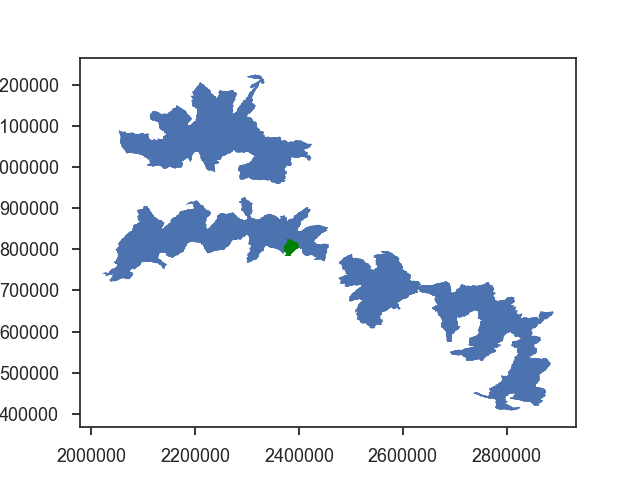

In [97]:
fig, ax = plt.subplots()
CaptainHucstable[(CaptainHucstable['element']=='ag_ppm') & (CaptainHucstable['formation'] =='Wagon Bed Formation')].plot(ax=ax)
val_huc[val_huc['Sample_ID']==validations.loc[0].Sample_ID].plot(ax=ax, color='green')


<IPython.core.display.Javascript object>


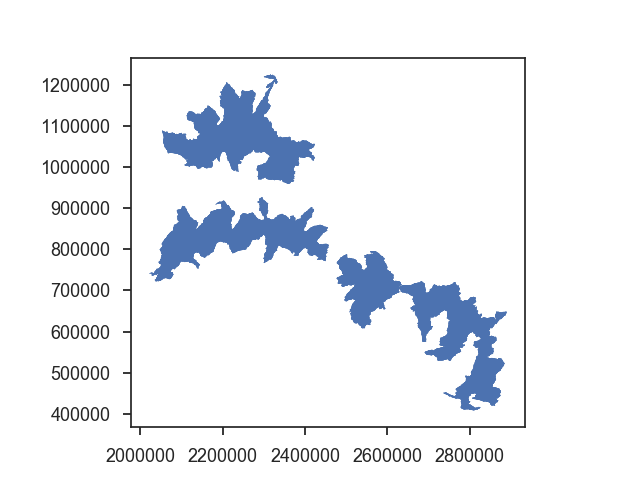

In [95]:
CaptainHucstable[(CaptainHucstable['element']=='ag_ppm') & (CaptainHucstable['formation'] =='Wagon Bed Formation')].plot()

In [74]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(inHouse.longitude, inHouse.latitude)]
crs = {'init': 'epsg:3732'} 
geo_df = GeoDataFrame(inHouse, crs={'init': 'epsg:4326'}, geometry=geometry)
geo_df.to_file(driver='ESRI Shapefile', filename='data.shp')
projGeoDF=geo_df.to_crs(crs)
val_huc = gpd.sjoin(huc12, projGeoDF)

In [78]:
val_huc.iloc[0]

AREA                                                     0.0124409
PERIMETER                                                 0.634663
WY_HU12_                                                       255
WY_HU12_ID                                                     104
HUC_8                                                     10080014
HUC_10                                                  1008001404
HUC_12                                                100800140408
ACRES                                                      26978.2
STATES                                                       MT,WY
NCONTRB_A                                                        0
HU_10_DS                                                1008001405
HU_10_NAME                                              Sage Creek
HU_10_MOD                                                       IT
HU_10_TYPE                                                       S
HU_12_DS                                              10080014